In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

### National analysis

In [13]:
df_naz = pd.read_csv('../dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv').set_index('data').drop('stato',1)
df_naz.tail()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
data,,,,,,,,,,
2020-03-03 18:00:00,1034,229,1263,1000,2263,428,160,79,2502,25856
2020-03-04 18:00:00,1346,295,1641,1065,2706,443,276,107,3089,29837
2020-03-05 18:00:00,1790,351,2141,1155,3296,590,414,148,3858,32362
2020-03-06 18:00:00,2394,462,2856,1060,3916,620,523,197,4636,36359
2020-03-07 18:00:00,2651,567,3218,1843,5061,1145,589,233,5883,42062


In [83]:
df_naz['delta_totale_casi'] = df_naz['totale_casi'].diff()
df_naz['delta_dimessi_guariti'] = df_naz['dimessi_guariti'].diff()
df_naz['delta_deceduti'] = df_naz['deceduti'].diff()

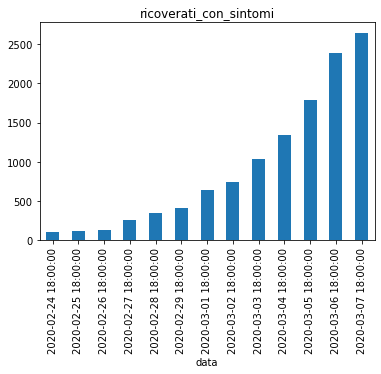

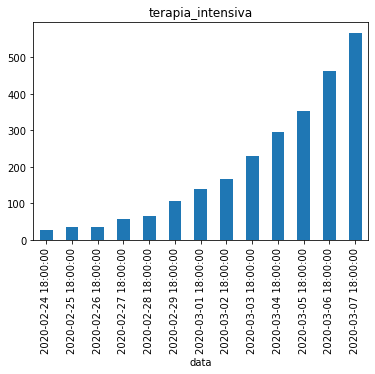

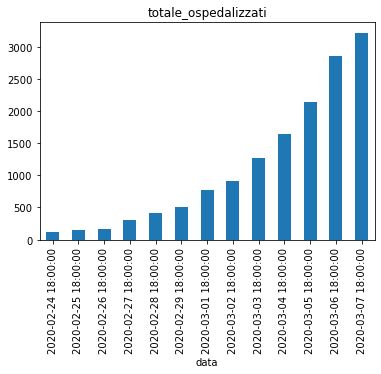

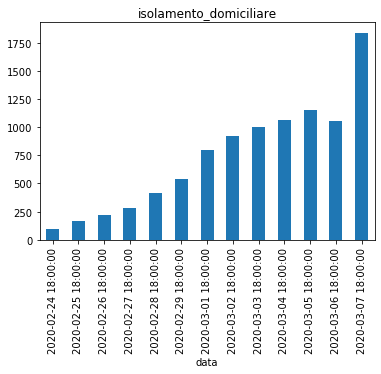

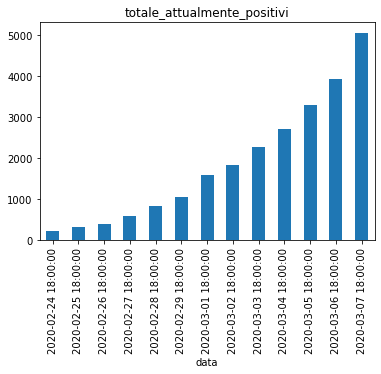

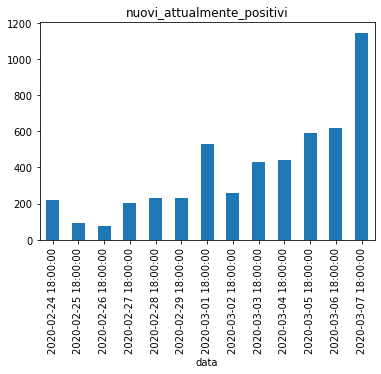

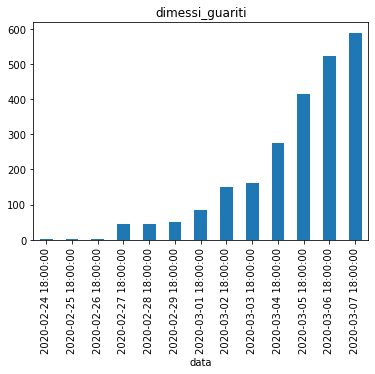

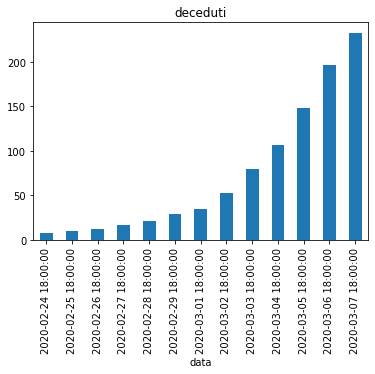

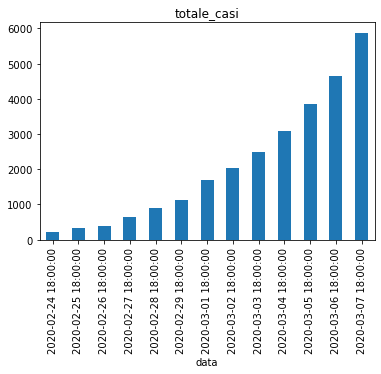

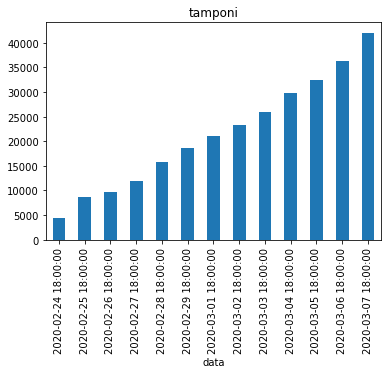

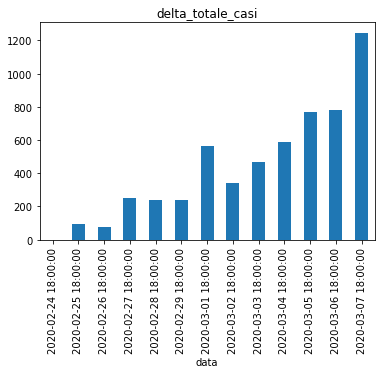

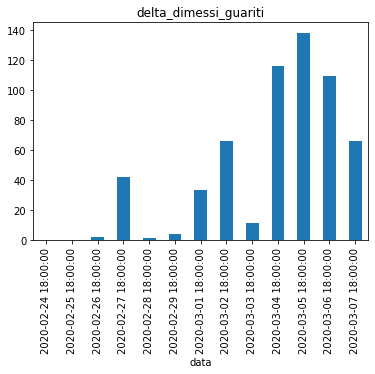

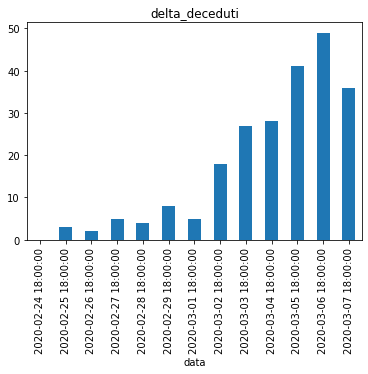

In [84]:
for col in df_naz.columns:
    plt.figure()
    df_naz[col].plot(kind='bar', title=col)

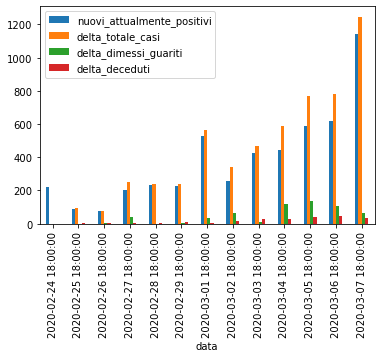

In [85]:
df_naz[['nuovi_attualmente_positivi', 'delta_totale_casi','delta_dimessi_guariti','delta_deceduti']].plot(kind='bar')

### province analysis

In [88]:
df_prov = pd.read_csv('../dati-province/dpc-covid19-ita-province.csv').set_index('data').drop('stato',1)

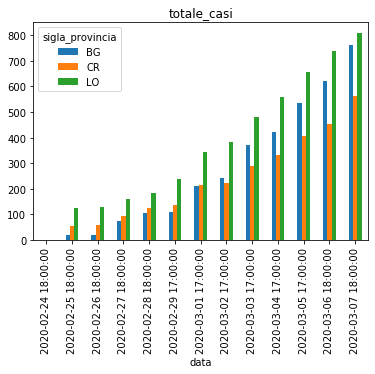

In [98]:
col = 'totale_casi'
num_prov_to_show = 3
top_province = df_prov.groupby('denominazione_provincia').sum().sort_values(by=col, ascending=False)[:num_prov_to_show].index #['Lodi', 'Milano']
df_province = df_prov[df_prov['denominazione_provincia'].isin(top_province)]
df_province = df_province.pivot_table(index=df_province.index,columns='sigla_provincia', values=col)
df_province.plot(kind='bar', title=col, legend=True)

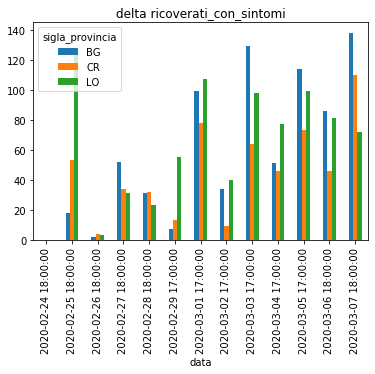

In [110]:
df_province.diff().plot(kind='bar', title='delta '+col, legend=True)

In [79]:
colormap = 'totale_casi'
fig = px.density_mapbox(df_prov, lat='lat', lon='long', z=colormap, radius=10, 
                        hover_name='denominazione_provincia',
                        zoom=5,  height=800,
                        animation_frame=df_prov.index,
                        mapbox_style="stamen-terrain")
fig.show()

### regional analysis

In [80]:
df_reg = pd.read_csv('../dati-regioni/dpc-covid19-ita-regioni.csv')
df_reg.tail()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
268,2020-03-07 18:00:00,ITA,9,Toscana,43.769231,11.255889,54,7.0,61,51,112,34,1,0,113,1331
269,2020-03-07 18:00:00,ITA,4,Trento,46.068935,11.121231,6,1.0,7,7,14,4,0,0,14,194
270,2020-03-07 18:00:00,ITA,10,Umbria,43.106758,12.388247,2,2.0,4,20,24,8,0,0,24,134
271,2020-03-07 18:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,1,0.0,1,7,8,1,0,0,8,32
272,2020-03-07 18:00:00,ITA,5,Veneto,45.434905,12.338452,123,41.0,164,341,505,51,25,13,543,14429


In [91]:
df_reg['delta_totale_casi'] = df_reg['totale_casi'].diff()
df_reg['delta_dimessi_guariti'] = df_reg['dimessi_guariti'].diff()
df_reg['delta_deceduti'] = df_reg['deceduti'].diff()

In [100]:
available_data = ['ricoverati_con_sintomi','terapia_intensiva','totale_ospedalizzati',
                  'isolamento_domiciliare','totale_attualmente_positivi','nuovi_attualmente_positivi',
                  'dimessi_guariti','deceduti','totale_casi','tamponi']

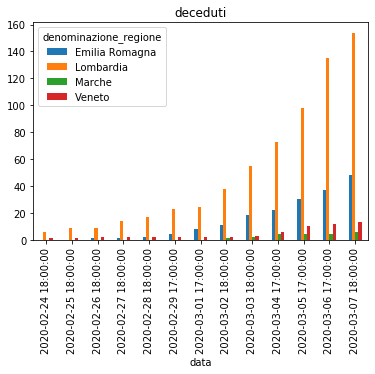

In [113]:
col = 'deceduti'
num_regions_to_show = 4
top_regions = df_reg.groupby('denominazione_regione').sum().sort_values(by=col, ascending=False)[:num_regions_to_show].index
df_regions = df_reg.set_index('data')[df_reg.set_index('data')['denominazione_regione'].isin(top_regions)]
df_regions = df_regions.pivot_table(index=df_regions.index,columns='denominazione_regione', values=col)
df_regions.plot(kind='bar', title=col, legend=True)

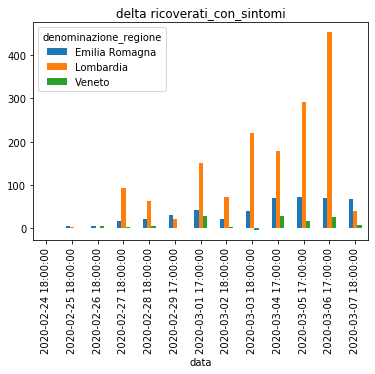

In [108]:
df_regions.diff().plot(kind='bar', title='delta '+col, legend=True)

In [82]:
colormap = 'terapia_intensiva'
fig = px.density_mapbox(df_reg, lat='lat', lon='long', z=colormap, radius=10, 
                        hover_name='denominazione_regione',
                        zoom=3,  height=800,
                        animation_frame='data',
                        mapbox_style="stamen-terrain")
fig.show()